In [2]:
import FYP_mlmodel
from collections import Counter
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import numpy as np 
import os

In [3]:
training_x = np.load('/Users/sumitkhare/training_x.npy', allow_pickle=True)
training_y = np.load('/Users/sumitkhare/training_y.npy', allow_pickle=True)
testing_x = np.load('/Users/sumitkhare/testing_x.npy', allow_pickle=True)
testing_y = np.load('/Users/sumitkhare/testing_y.npy', allow_pickle=True)

In [4]:
print(f'Training Images: {len(training_x)} \nTraining Labels: {len(training_y)} \nTesting Images: {len(testing_x)} \nTesting Labels: {len(testing_y)}')

Training Images: 10796 
Training Labels: 10796 
Testing Images: 1200 
Testing Labels: 1200


In [5]:
test_labels_dist = np.argmax(testing_y, axis=1)
training_labels_dist = np.argmax(training_y, axis=1)

In [6]:
print(f'{Counter(test_labels_dist)} --- {Counter(training_labels_dist)}')

Counter({3: 367, 0: 307, 1: 271, 2: 255}) --- Counter({3: 3147, 1: 2789, 0: 2745, 2: 2115})


In [7]:
model = FYP_mlmodel.createCustomModel()

2022-11-20 23:27:05.991511: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 123, 123, 64)      36928     
                                                        

In [9]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
history = model.fit(training_x, training_y, batch_size=100, epochs=5, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/5
87/87 [==============================] - 3002s 34s/step - loss: 0.7533 - accuracy: 0.6833 - val_loss: 0.7400 - val_accuracy: 0.6866
Epoch 2/5
87/87 [==============================] - 3550s 41s/step - loss: 0.6437 - accuracy: 0.7409 - val_loss: 0.7087 - val_accuracy: 0.6907
Epoch 3/5
87/87 [==============================] - 3730s 43s/step - loss: 0.5636 - accuracy: 0.7816 - val_loss: 0.5483 - val_accuracy: 0.7866
Epoch 4/5
87/87 [==============================] - 3550s 41s/step - loss: 0.5023 - accuracy: 0.8088 - val_loss: 0.4668 - val_accuracy: 0.8171
Epoch 5/5
87/87 [==============================] - 3381s 39s/step - loss: 0.4426 - accuracy: 0.8313 - val_loss: 0.4116 - val_accuracy: 0.8380


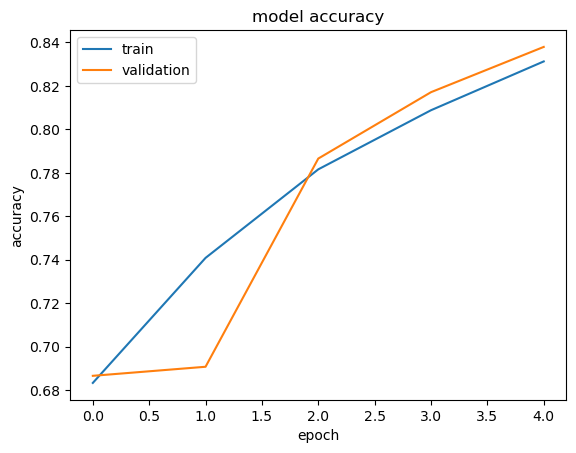

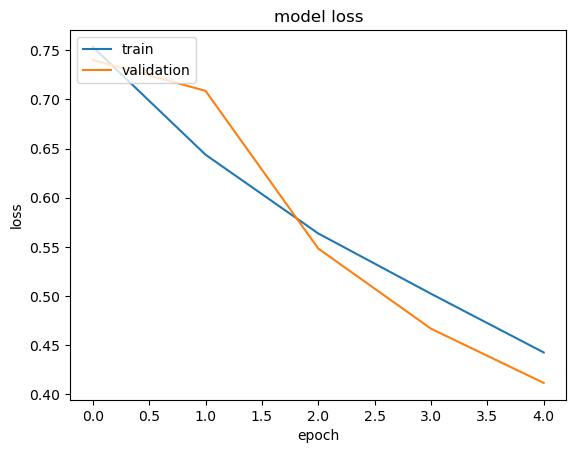

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [17]:
np.save('custom_model_history_5epoch.npy',history.history)

In [18]:
history=np.load('custom_model_history_5epoch.npy',allow_pickle='TRUE').item()

In [19]:
model.save('/Users/sumitkhare/custom')
model.save_weights("/Users/sumitkhare/custom5epoch")

INFO:tensorflow:Assets written to: /Users/sumitkhare/custom/assets


INFO:tensorflow:Assets written to: /Users/sumitkhare/custom/assets
